# EDA

In [16]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datathon_data.csv')

# Encode labels: "regular" = 0, "anomal" = 1
df["label_encoded"] = df["label"].apply(lambda x: 1 if x == "anomal" else 0)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(df[['DMBTR', 'WRBTR']].values)
df[['DMBTR', 'WRBTR']] = X_normalized
df


,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label,label_encoded
0,0,C3,C31,C9,C92,A3,B1,-0.298142,-0.076700,regular,0
1,1,C1,C18,C7,C76,A1,B2,-0.368357,0.223083,regular,0
2,2,C1,C19,C2,C20,A1,B3,0.016167,3.845589,regular,0
3,3,C4,C48,C9,C95,A2,B1,0.817289,-0.041248,regular,0
4,4,C5,C58,C1,C19,A3,B1,-0.005647,-0.076274,regular,0
...,...,...,...,...,...,...,...,...,...,...,...
533004,533004,C1,C18,C3,C32,A1,B2,0.733601,-0.076700,regular,0
533005,533005,C8,C80,C1,C11,A1,B1,-0.247454,-0.061837,regular,0
533006,533006,C1,C10,C1,C19,A1,B1,-0.339416,0.325925,regular,0
533007,533007,C1,C14,C4,C40,A1,B3,-0.024220,-0.076700,regular,0


## Correlation Heatmap

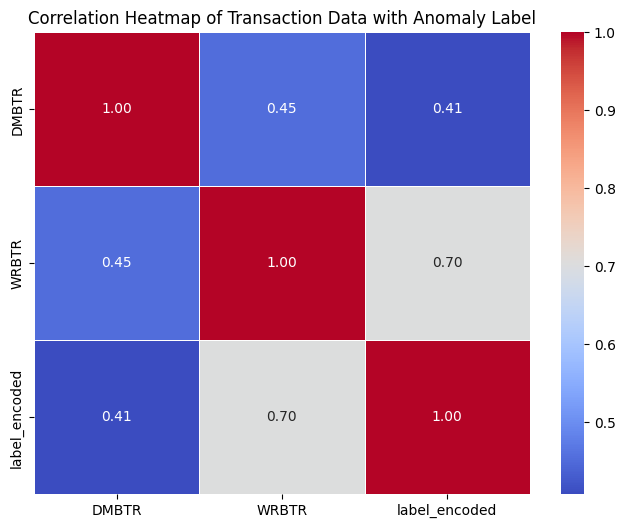

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Encode labels: "regular" = 0, "anomal" = 1
df["label_encoded"] = df["label"].apply(lambda x: 1 if x == "anomal" else 0)

# Convert relevant columns to numeric for correlation analysis
numeric_columns = ["DMBTR", "WRBTR", "label_encoded"]
df_numeric = df[numeric_columns].copy()

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Transaction Data with Anomaly Label")
plt.show()

Class imbalance impacts corr heatmap too much, it is not informative at all

In [13]:
from scipy.stats import pointbiserialr


# Compute point-biserial correlation for numeric features
point_biserial_results = {
    "Feature": [],
    "Point-Biserial Correlation": [],
    "p-value": []
}

for feature in ["DMBTR", "WRBTR"]:
    corr, p_value = pointbiserialr(df[feature], df["label_encoded"])
    point_biserial_results["Feature"].append(feature)
    point_biserial_results["Point-Biserial Correlation"].append(corr)
    point_biserial_results["p-value"].append(p_value)

# Convert results to a DataFrame
point_biserial_df = pd.DataFrame(point_biserial_results)

# Display results


print(point_biserial_df)

  Feature  Point-Biserial Correlation  p-value
0   DMBTR                    0.407733      0.0
1   WRBTR                    0.703103      0.0


This is also trash

## K-means

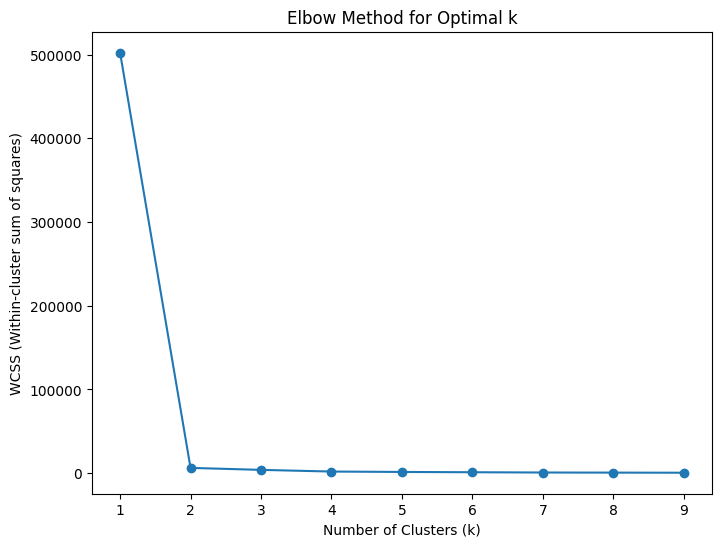

In [18]:
import numpy as np 
from sklearn.cluster import KMeans



# Reduce dataset size by sampling
num_regular_samples = 5000  # Take a subset of regular transactions for balance
regular_sample = df[df["label"] == "regular"].sample(n=num_regular_samples, random_state=42)
anomal_sample = df[df["label"] == "anomal"]  # Keep all anomalous transactions

# Combine sampled regular and all anomalous transactions
df_sampled = pd.concat([regular_sample, anomal_sample])

# Select numeric features for clustering
X = df_sampled[["DMBTR", "WRBTR"]].values

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
k_values = range(1, 10)  # Test clusters from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve to find optimal k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

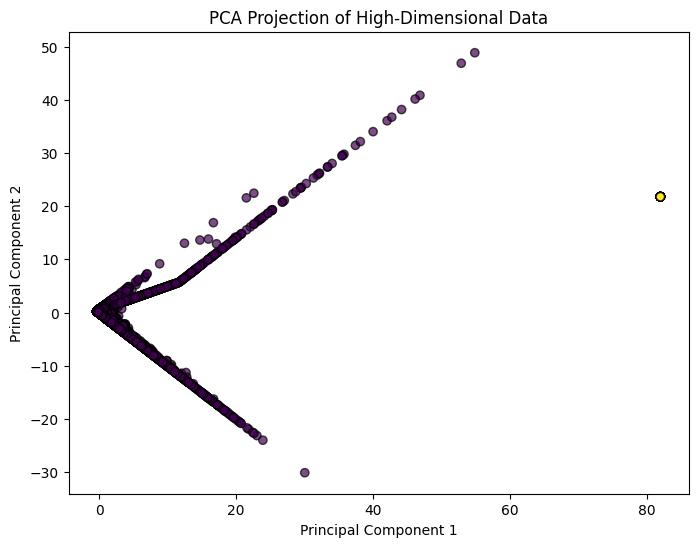

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[numeric_columns[:-1]])

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label_encoded'] , marker='o', edgecolors='k', alpha=0.7, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of High-Dimensional Data')
plt.show()


In [20]:
numeric_columns[:-1]

['DMBTR', 'WRBTR']

## SVD

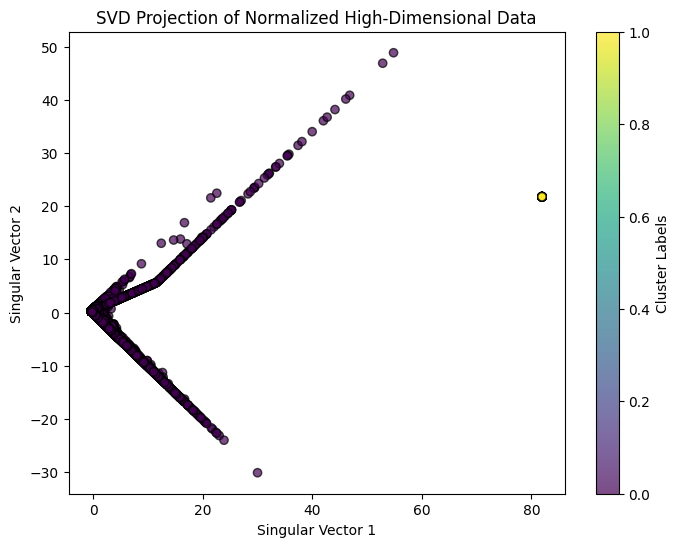

In [22]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(df[numeric_columns[:-1]])
# Plot results with color based on labels
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df['label_encoded'], cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.xlabel('Singular Vector 1')
plt.ylabel('Singular Vector 2')
plt.title('SVD Projection of Normalized High-Dimensional Data')
plt.colorbar(label='Cluster Labels')
plt.show()


In [23]:
df

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label,label_encoded
0,0,C3,C31,C9,C92,A3,B1,-0.298142,-0.076700,regular,0
1,1,C1,C18,C7,C76,A1,B2,-0.368357,0.223083,regular,0
2,2,C1,C19,C2,C20,A1,B3,0.016167,3.845589,regular,0
3,3,C4,C48,C9,C95,A2,B1,0.817289,-0.041248,regular,0
4,4,C5,C58,C1,C19,A3,B1,-0.005647,-0.076274,regular,0
...,...,...,...,...,...,...,...,...,...,...,...
533004,533004,C1,C18,C3,C32,A1,B2,0.733601,-0.076700,regular,0
533005,533005,C8,C80,C1,C11,A1,B1,-0.247454,-0.061837,regular,0
533006,533006,C1,C10,C1,C19,A1,B1,-0.339416,0.325925,regular,0
533007,533007,C1,C14,C4,C40,A1,B3,-0.024220,-0.076700,regular,0


## Frontend plots

Boxplots represent differences in anomaly vs regular data

In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('data/datathon_data.csv')
df

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,0,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,4,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
...,...,...,...,...,...,...,...,...,...,...
533004,533004,C1,C18,C3,C32,A1,B2,2501589.15,0.00,regular
533005,533005,C8,C80,C1,C11,A1,B1,390076.18,12065.45,regular
533006,533006,C1,C10,C1,C19,A1,B1,192147.38,326823.09,regular
533007,533007,C1,C14,C4,C40,A1,B3,870539.68,0.00,regular


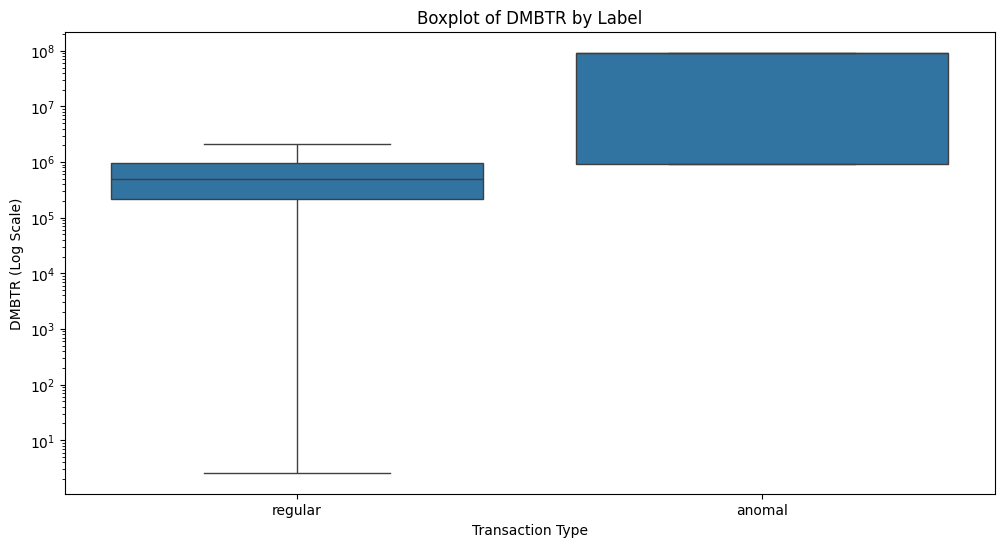

In [7]:

# Boxplots for DMBTR and WRBTR by label
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="label", y="DMBTR", showfliers=False)
plt.yscale("log")
plt.xlabel("Transaction Type")
plt.ylabel("DMBTR (Log Scale)")
plt.title("Boxplot of DMBTR by Label")
plt.show()

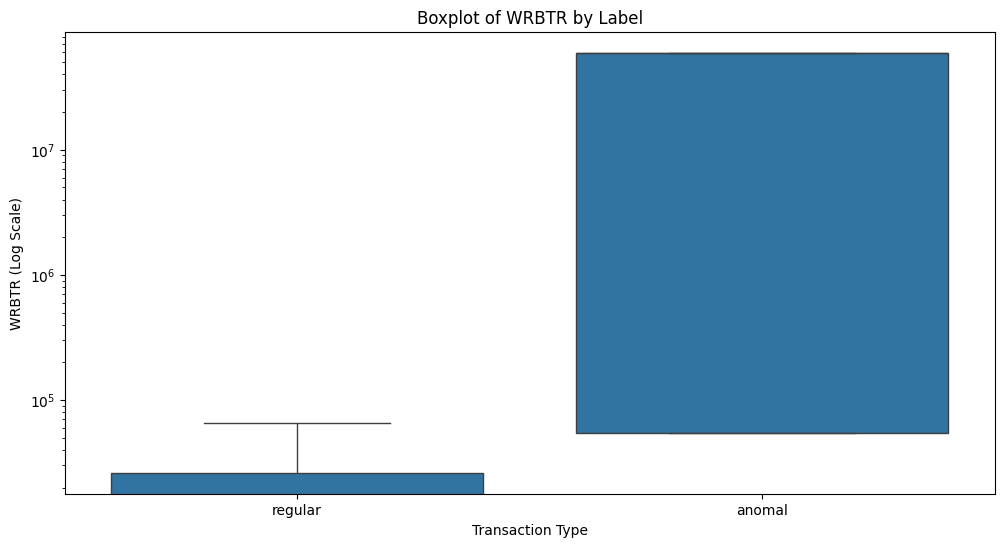

In [8]:


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="label", y="WRBTR", showfliers=False)
plt.yscale("log")
plt.xlabel("Transaction Type")
plt.ylabel("WRBTR (Log Scale)")
plt.title("Boxplot of WRBTR by Label")
plt.show()


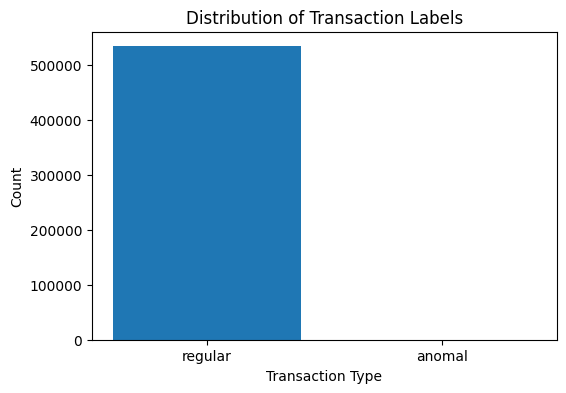

In [9]:
import matplotlib.pyplot as plt

# Countplot of labels (Regular vs Anomaly)
label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Labels")
plt.show()


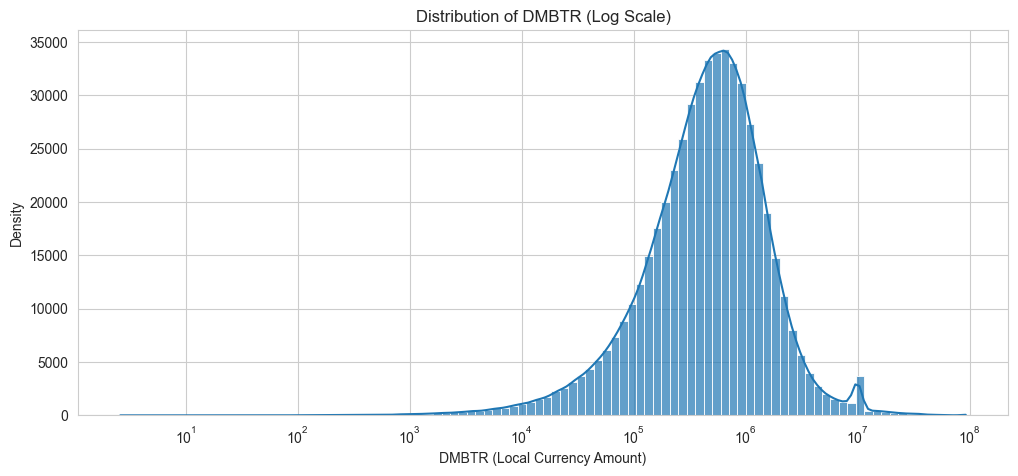

In [15]:
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Histograms of transaction amounts (DMBTR and WRBTR) by label
plt.figure(figsize=(12, 5))
sns.histplot(df, x="DMBTR", bins=100, log_scale=True, kde=True, alpha=0.7)
plt.xlabel("DMBTR (Local Currency Amount)")
plt.ylabel("Density")
plt.title("Distribution of DMBTR (Log Scale)")
plt.show()



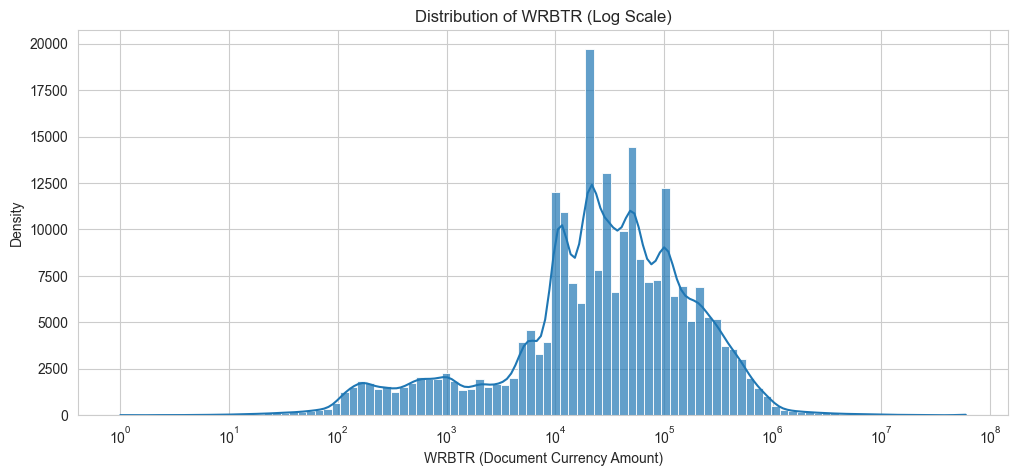

In [14]:
import numpy as np

# Filter out infinite and zero values for WRBTR to avoid issues with log scale
df_filtered = df[(df["WRBTR"] > 0) & np.isfinite(df["WRBTR"])]


plt.figure(figsize=(12, 5))
sns.histplot(df_filtered, x="WRBTR", bins=100, log_scale=True, kde=True, alpha=0.7)
plt.xlabel("WRBTR (Document Currency Amount)")
plt.ylabel("Density")
plt.title("Distribution of WRBTR (Log Scale)")
plt.show()

## Conclusions
So we can build visible clusters meaning we can actually differentiate anomaly from regular